In [1]:
import numpy as np

In [2]:
X = np.random.rand(20,1) * 10 -5

In [3]:
y = np.sin(X)

In [4]:
X.shape,y.shape

((20, 1), (20, 1))

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
import keras.backend as K
K.clear_session()
K.set_learning_phase(1)

In [7]:
model = Sequential()
model.add(Dense(1,input_dim = 1))


model.add(Dropout(0.1))
model.add(Dense(20))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(20))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(20))
model.add(Activation('sigmoid'))
model.add(Dense(1))

In [8]:
from keras.optimizers import SGD

In [9]:
model.compile(loss='mse',optimizer=SGD(lr=0.01))

In [10]:
model.fit(X,y,epochs=10000,batch_size=10,verbose=0)

In [11]:
X_test = np.arange(-10,10,0.1)

In [12]:
X_test = np.expand_dims(X_test,-1)

In [13]:

probs = []
for i in range(100):
    out = model.predict(X_test)
    probs.append(out)

In [14]:
p = np.array(probs)

In [15]:
p.shape

(100, 200, 1)

In [16]:
mean = np.mean(p,axis=0)
std = np.std(p,axis=0)


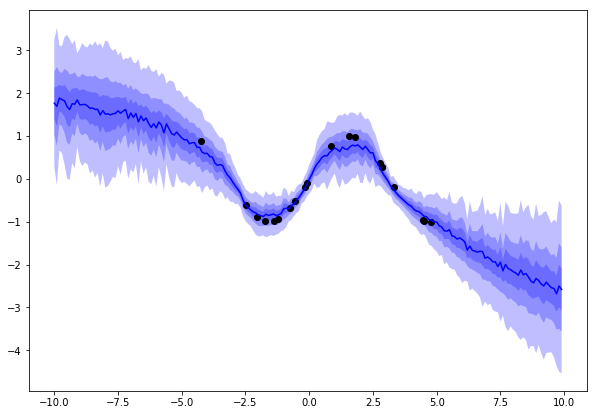

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(X_test,mean,c='blue')

lower_bound = mean - std * 0.5
upper_bound =  mean + std * 0.5
plt.fill_between(X_test.flatten(),upper_bound.flatten(),lower_bound.flatten(),alpha=0.25, facecolor='blue')

lower_bound = mean - std
upper_bound =  mean + std
plt.fill_between(X_test.flatten(),upper_bound.flatten(),lower_bound.flatten(),alpha=0.25, facecolor='blue')

lower_bound = mean - std * 2
upper_bound =  mean + std * 2
plt.fill_between(X_test.flatten(),upper_bound.flatten(),lower_bound.flatten(),alpha=0.25, facecolor='blue')

plt.scatter(X,y,c='black')